In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Classical Conditioning Simulations
Complete Serial Compound (CSC) approach

In [15]:
class TDModel:
    
    colors = plt.cm.Set1([1/9 * _ for _ in range(9)])
    
    def __init__(self, n_features, alpha=0.05, gamma=0.9, lambd=0.9):
        # Model parameters
        self.alpha = alpha
        self.gamma = gamma
        self.lambd = lambd
        self.n_features = n_features
        # Model dynamic variables
        self.reset()
        
    def load_setting(self, setting):
        self.setting = setting
        
    def reset(self):
        self.w = np.zeros(self.n_features)      # associative strengths
        self.z = np.zeros(self.n_features)      # eligibility trace vector 
        
    def train(self, n_trials):
        '''Train agent behavior modifying associative strengths'''

        n_tstep = self.setting.shape[1]

        w_hist = np.zeros((n_tstep, n_trials, self.n_features))
        
        for trial in range(n_trials):
            
            for t in range(1, n_tstep):

                # Current trial
                r = self.setting[0][t]
                x = self.setting[1:, t-1:t+1].T 
                
                # Calculate prediction error
                self.z = self.gamma * self.lambd * self.z + x[-1]
                pe = r + self.gamma * self.value(x[-1], self.w) - self.value(x[0], self.w)
                self.w += self.alpha * pe * self.z
            
                w_hist[t, trial] = self.w
            
        return w_hist
    
    def plot_setting(self):
        '''Plot experimental setting given setting array.'''
        n_tstep = self.setting.shape[1]
        n_stimu = self.setting.shape[0]

        fig, axes = plt.subplots(nrows=n_stimu, ncols=1, 
                                 sharex=True, facecolor='w')

        setting0 = np.hstack((self.setting, np.zeros((n_stimu, 1))))

        # Plotting
        for i, row in enumerate(setting0):
            if i == 0:
                axes[i].step(np.arange(0, n_tstep+1), row, where='post',
                             label='US', color=TDModel.colors[i], linewidth=3)
            else:
                axes[i].step(np.arange(0, n_tstep+1), row, where='post',
                             label=f'CS{i}', color=TDModel.colors[i], linewidth=3)

        # Additional formatting
        plt.xlabel('Time')
        for ax in axes:
            ax.set_yticks([])
            ax.set_ylim(-.1, 1.1)
            ax.legend(loc='center left')
        
    @staticmethod
    def value(x, w):
        return np.sum(np.multiply(x, w))    

### Experiment 1. Kamin's blocking effect

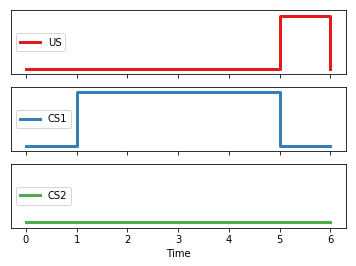

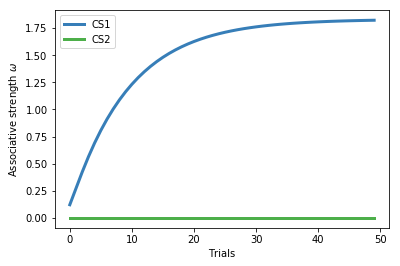

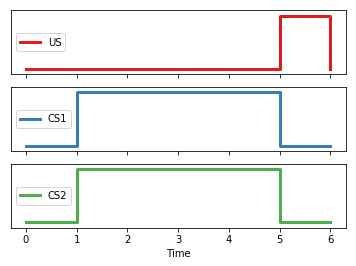

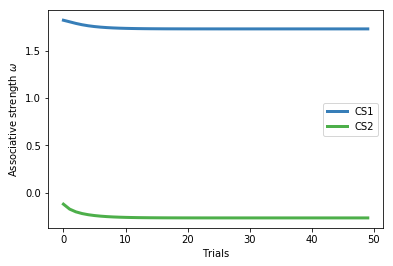

In [18]:
tdm = TDModel(n_features=2)

# Phase 1 – conditioning first stimuli
setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist = tdm.train(50)

plt.figure(facecolor='w')
plt.plot(hist[-1, :, 0], color=TDModel.colors[1], label='CS1', linewidth=3)
plt.plot(hist[-1, :, 1], color=TDModel.colors[2], label='CS2', linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()

# Phase 2 – pairing second stimuli with first stimuli
setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist = tdm.train(50)

plt.figure(facecolor='w')
plt.plot(hist[-1, :, 0], color=TDModel.colors[1], label='CS1', linewidth=3)
plt.plot(hist[-1, :, 1], color=TDModel.colors[2], label='CS2', linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()

### Experiment 2. Second-order conditioning

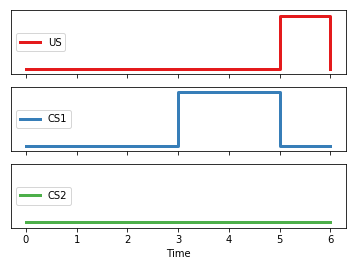

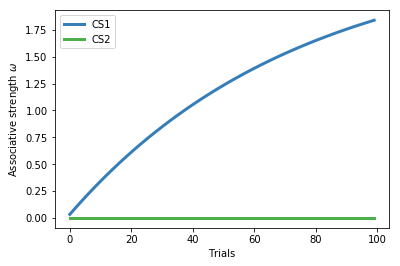

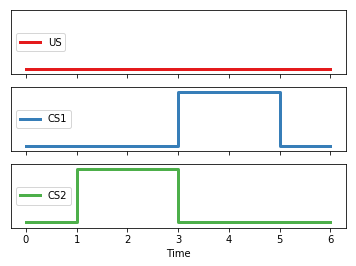

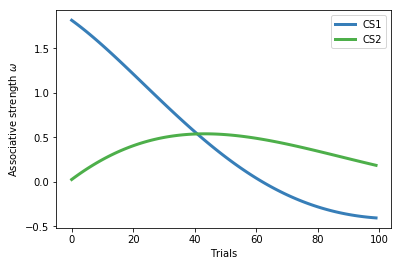

In [331]:
tdm = TDModel(n_features=2)

# Phase 1 – conditioning first stimuli
setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist = tdm.train(100)

plt.figure(facecolor='w')
plt.plot(hist[-1, :, 0], color=TDModel.colors[1], label='CS1', linewidth=3)
plt.plot(hist[-1, :, 1], color=TDModel.colors[2], label='CS2', linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()

# Phase 2 – pairing second stimuli with first stimuli
setting = np.array([[0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 0],
                    [0, 1, 1, 0, 0, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist = tdm.train(100)

plt.figure(facecolor='w')
plt.plot(hist[-1, :, 0], color=TDModel.colors[1], label='CS1', linewidth=3)
plt.plot(hist[-1, :, 1], color=TDModel.colors[2], label='CS2', linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()

### Experiment 3. The Egger-Miller effect (primacy effect)

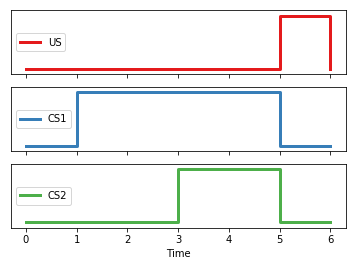

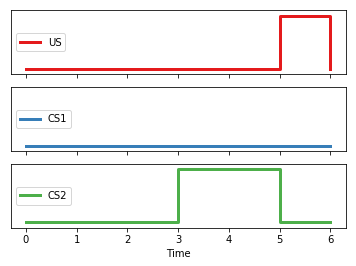

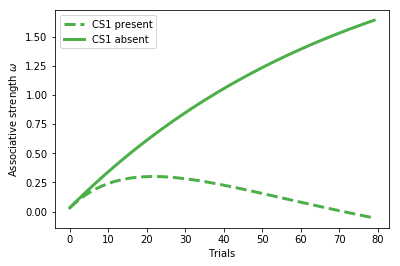

In [332]:
# Setting 1 – conditioning both stimuli
tdm = TDModel(n_features=2)

setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 1, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist1 = tdm.train(80)

# Setting 2 – conditioning only second stimuli
tdm = TDModel(n_features=2)

setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 0]])
tdm.load_setting(setting)
tdm.plot_setting()

hist2 = tdm.train(80)

plt.figure(facecolor='w')
plt.plot(hist1[-1, :, 1], '--', color=TDModel.colors[2], label='CS1 present', 
         linewidth=3)
plt.plot(hist2[-1, :, 1], '-', color=TDModel.colors[2], label='CS1 absent', 
         linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()

### Experiment 4. Temporal primacy overriding blocking

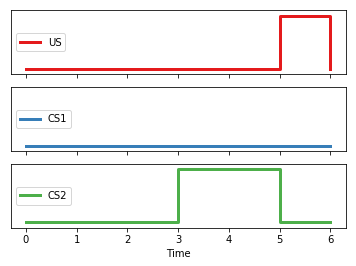

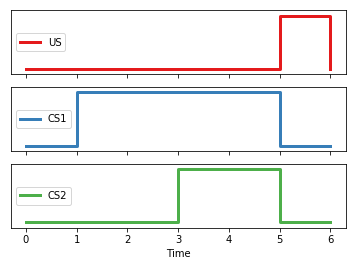

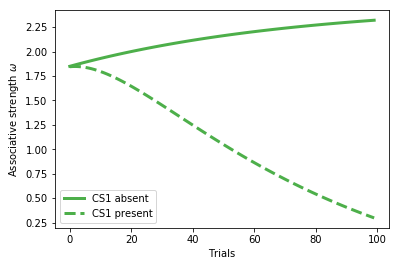

In [335]:
# Setting 1 – training CS2 for 200 trials
tdm = TDModel(n_features=2)

setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 0]])
tdm.load_setting(setting)
tdm.plot_setting()
hist1 = tdm.train(200)
hist1 = hist1[-1, -100:, :]

# Setting 2 – CS1 introduced after CS2 is trained
tdm = TDModel(n_features=2)

setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 1, 0]])
tdm.load_setting(setting)
_ = tdm.train(100)
setting = np.array([[0, 0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 1, 0]])
tdm.load_setting(setting)
tdm.plot_setting()
hist2 = tdm.train(100)

plt.figure(facecolor='w')
plt.plot(hist1[:, 1], '-', color=TDModel.colors[2], label='CS1 absent', 
         linewidth=3)
plt.plot(hist2[-1, :, 1], '--', color=TDModel.colors[2], label='CS1 present', 
         linewidth=3)
plt.xlabel('Trials')
plt.ylabel('Associative strength $\omega$')
plt.legend()